<a href="https://colab.research.google.com/github/NatanXimenes/Analise-dados-GooglePlayStore/blob/main/GooglePlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Google Play Store apps***
Os aplicativos móveis estão por toda parte. Eles são fáceis de criar e podem ser lucrativos. Por causa desses dois fatores, cada vez mais aplicativos estão sendo desenvolvidos. Neste notebook, faremos uma análise abrangente do mercado de aplicativos Android, comparando mais de dez mil aplicativos no Google Play em diferentes categorias. Buscaremos percepções nos dados para planejar estratégias para impulsionar o crescimento e a retenção.

 ***1. Vamos dar uma olhada nos dados, que consistem em dois arquivos:***
 
**apps.csv**: contém todos os detalhes dos aplicativos no Google Play. Existem 13 recursos que descrevem um determinado aplicativo.

In [1]:
#Vamos ler o dataset
import pandas as pd
apps = pd.read_csv('/content/drive/MyDrive/GoogleApps dataset/googleplaystore.csv')

#Removendo os duplicados
apps = apps.drop_duplicates()

#Vamos analisar o número de apps:
print('numero total de apps do dataset = ', len(apps))

#Vamos dar uma olhada em 5 linhas aleatoriamente:
n=10
apps.sample(n)

numero total de apps do dataset =  10358


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1737,Talking Tom Gold Run,GAME,4.6,2698348,78M,"100,000,000+",Free,0,Everyone,Action,"July 31, 2018",2.8.2.59,4.1 and up
3569,Dropbox,PRODUCTIVITY,4.4,1861309,61M,"500,000,000+",Free,0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
4710,Cheat Codes for GTA V,FAMILY,4.3,589,3.6M,"100,000+",Free,0,Mature 17+,Entertainment,"September 3, 2017",1.8.0,4.0 and up
2538,tökr,MEDICAL,4.6,17,14M,"1,000+",Free,0,Everyone,Medical,"July 11, 2018",1.9.0.0,4.1 and up
5326,Al jazeera TV,FAMILY,4.6,9952,3.7M,"100,000+",Free,0,Teen,Entertainment,"July 5, 2016",1.0.0,4.0.3 and up
2786,Receipt Hog - Receipts to Cash,SHOPPING,4.5,72596,19M,"1,000,000+",Free,0,Teen,Shopping,"August 3, 2018",4.2.2,4.1 and up
4383,Hands 'n Guns Simulator,FAMILY,3.9,19727,76M,"1,000,000+",Free,0,Teen,Simulation,"July 3, 2018",32,4.1 and up
5277,Puppy Shooting an AK-47: Platformer Zombie Game,GAME,4.8,21,89M,"1,000+",Free,0,Everyone,Arcade,"March 30, 2018",0.46.91,4.4 and up
6279,Business Intelligence & Data,FAMILY,4.9,7,3.5M,"1,000+",Free,0,Everyone,Education,"July 26, 2016",1.0,2.0 and up
8582,Disciple Maker’s (DM) Lab,FAMILY,5.0,3,4.0M,100+,Free,0,Everyone,Education,"August 1, 2018",1.0.5,4.4 and up


***2. Limpeza dos dados***

Podemos observar acima que a tabela 'Installs' e 'Price' possuem caracteres especiais, vamos remove-los para ter apenas valores puramente numéricos.

In [2]:
#caracteres a serem removidos:
caracteres_a_remover = ['+', ',', '$']

#das seguintes colunas
colunas_sujas = ['Installs', 'Price']

#fazendo um loop para selecionar as colunas em questao
for colunas in colunas_sujas:
#para os caracteres
  for caracteres in caracteres_a_remover:
#para substituir esses caracteres por um espaço vazio
    apps[colunas] = apps[colunas].apply(lambda x: x.replace(caracteres, ''))  

#Mostrando um sumario dos apps:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


***3. Corrigindo o tipos de dados***

Se você observar acima, as colunas 'Installs' e 'Price' são do tipo object, vamos precisar fazer uso delas, por isso vamos converte-las para o float.

In [3]:
#importando a biblioteca numpy que faremos uso 
import numpy as np

#convertendo Installs e depois Price
#o codigo retornou um erro pois uma string estava na coluna Installs, foi deletada como abaixo
apps[apps['Installs'] == 'Free']
apps = apps.drop(10472)

apps['Installs'] = apps['Installs'].astype(float)
apps['Price'] = apps['Price'].astype(float)

#conferindo os tipos de dados do dataset
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


***4. Explorando as categorias de apps***

Os apps da play store são agrupados por categorias, vamos levantar as seguintes questões: 
* Qual categoria tem o maior número de aplicativos no mercado?
* Existe alguma categoria específica dominando o mercado?
* Quais categorias têm o menor número de aplicativos?

In [4]:
#importando bibliotecas necessárias para o uso
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'


#obtendo as categorias únicas
num_categorias = len(apps['Category'].unique())
print('Numero de categorias = ', num_categorias)
#resultado: Numero de categorias =  33

#numero de apps em cada categoria:
num_apps_categoria = apps['Category'].value_counts()

#ordenando do maior num de apps por categoria para o menor
ord_num_apps_categoria = num_apps_categoria.sort_values(ascending = False)

#plotando o gráfico
data = [go.Bar(
        x = ord_num_apps_categoria.index, # indice = categoria
        y = ord_num_apps_categoria.values, # valor = contagem
        )]

plotly.offline.iplot(data)

Numero de categorias =  33


***5. Distribuição das avaliações dos apps***

Os apps são avaliados com uma nota de 0 a 5, vamos avaliar isso:

In [5]:
# Media de avaliações
media_avaliacoes = apps['Rating'].mean()
print('Average app rating = ', media_avaliacoes)

# Distribuição de acordo com as avaliações
data = [go.Histogram(
        x = apps['Rating']
)]

# Grafico na vertical, mostrando a distribuição quantidade x avaliações 
layout = {'shapes': [{
              'type' :'line',
              'x0': media_avaliacoes,
              'y0': 0,
              'x1': media_avaliacoes,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.187876743139908


***6. Tamanho e preço de um app***

Duas variáveis importantes a se analisar, o tamanho quando muito grande ou um preço elevado
Podemos levantar algumas questões:
- O tamanho de um app afeta sua avaliação?
- Os usuários realmente se preocupam com aplicativos pesados ​​do sistema ou preferem aplicativos leves?
- O preço de um aplicativo afeta sua avaliação?
- Os usuários sempre preferem aplicativos gratuitos em vez de aplicativos pagos? 

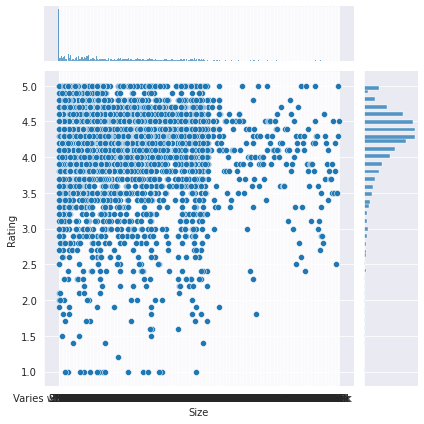

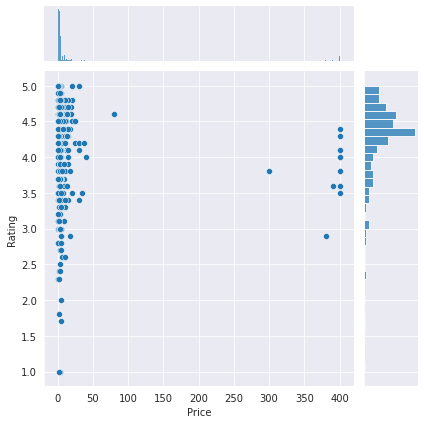

In [6]:
#importando bibliotecas necessárias para o uso
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Selecionando apenas os valores em 'Size'(tamanho) e 'Rating'(avalições) que não são nulos
apps_n_nulos = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Selecionando apenas por categorias que tem pelo menos 250 apps 
categorias_maiores = apps_n_nulos.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plotando tamanho x avalições
plt1 = sns.jointplot(x = categorias_maiores['Size'], y = categorias_maiores['Rating'])

# Apps com tipo pago:
apps_pagos = apps_n_nulos[apps_n_nulos['Type'] == 'Paid']

# Plotando preço x avalições
plt2 = sns.jointplot(x = apps_pagos['Price'], y = apps_pagos['Rating'])

Foi observado que a maioria dos apps com melhor classificação(acima de 4) varia de 2 MB a 20 MB e que a grande maioria dos aplicativos tem preço inferior a $ 10.

## ***7. Relacionando Categorias com preços***

O preço pode ser um fator definitivo na decisão de um cliente na hora da compra de um app, podendo desistir ao simplesmente ver um valor alto. Vamos relacionar a distribuição de valores por categoria.

Text(0.5, 1.0, 'Preços apps x categorias populares ')

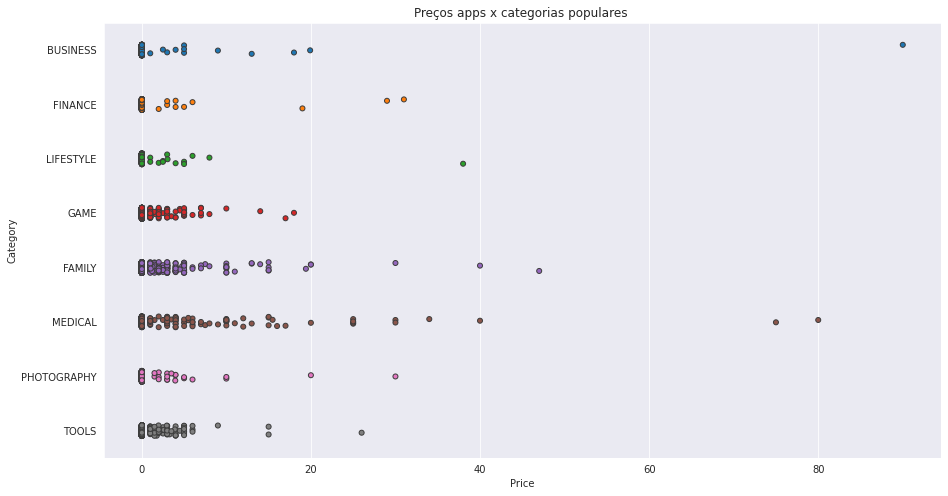

In [7]:
import matplotlib.pyplot as plt

# Escolhendo as categorias mais populares
categorias_populares = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
#Outliers: Nesse dataset pode ser identificado uma grande quantidade de apps com valores exorbitantes, criados por devs como treino que determinaram esse valor alto como uma 'brincadeira'    
#Vamos considerar apenas os app com valores inferiores a 100 dolares                              
apps_inferiores_a_100 = categorias_populares[categorias_populares['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

#Examinando preços de apps x categorias populares 
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_inferiores_a_100, jitter = True, linewidth = 1)
ax.set_title('Preços apps x categorias populares ')

                        

***9. Popularidade de apps pagos x gratuitos***

Os apps pagos são instalandos tanto quanto os gratuitos?

In [8]:
Pagos = go.Box(
    # Para os app pagos
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Pagos'
)

Gratuitos = go.Box(
    # Para os apps gratuitos
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Gratuitos'
)

layout = go.Layout(
    title = "Número de downloads de apps pagos x gratuitos",
    yaxis = dict(title = "Log do num de downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [Pagos, Gratuitos]
plotly.offline.iplot({'data': data, 'layout': layout})

Acontece que os aplicativos pagos têm um número relativamente menor de instalações do que os aplicativos gratuitos, embora a diferença não seja tão grande quanto eu esperava!

**Neste notebook, foram analisados mais de dez mil aplicativos da Google Play Store. Pode-se usar essas descobertas para informar decisões, caso se deseje criar um aplicativo por conta própira.**